# Installing and Importing Libraries

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import glob
import requests
from io import BytesIO

from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt

import torch

print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

%matplotlib inline

Using torch 1.12.1 (CPU)


### Pre Processing the dataset

In [3]:
!python preprocess.py

100%|███████████████████████████████████████| 853/853 [00:00<00:00, 3624.55it/s]


# Training model

In [2]:
%cd yolov5

/Users/praveenpandi/Downloads/FaceMaskDetectionProject/yolov5


In [4]:
!python train.py --img 640 --batch 16 --epochs 100 --data ../mask_config.yaml --weights ../models/mask_yolov5.pt --workers 0

train: weights=../models/mask_yolov5.pt, cfg=, data=../mask_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-162-gc3e4e94e Python-3.10.9 torch-1.12.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degree

# Evaluating model Performance
Training losses and performance metrics are saved in runs folder

In [5]:
from utils.plots import plot_results
plot_results('runs/train/exp/results.csv')

### Predicting on Images

In [6]:
!python detect.py --source ../datasets/mask/valid/images/ --weights ../models/mask_yolov5.pt --conf 0.4

detect: weights=['../models/mask_yolov5.pt'], source=../datasets/mask/valid/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-162-gc3e4e94e Python-3.10.9 torch-1.12.1 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 213 layers, 7018216 parameters, 0 gradients
image 1/171 /Users/praveenpandi/Downloads/FaceMaskDetectionProject/datasets/mask/valid/images/maksssksksss125.png: 640x512 1 without_mask, 292.1ms
image 2/171 /Users/praveenpandi/Downloads/FaceMaskDetectionProject/datasets/mask/valid/images/maksssksksss135.png: 384x640 2 with_masks, 215.7ms
image 3/171 /Us

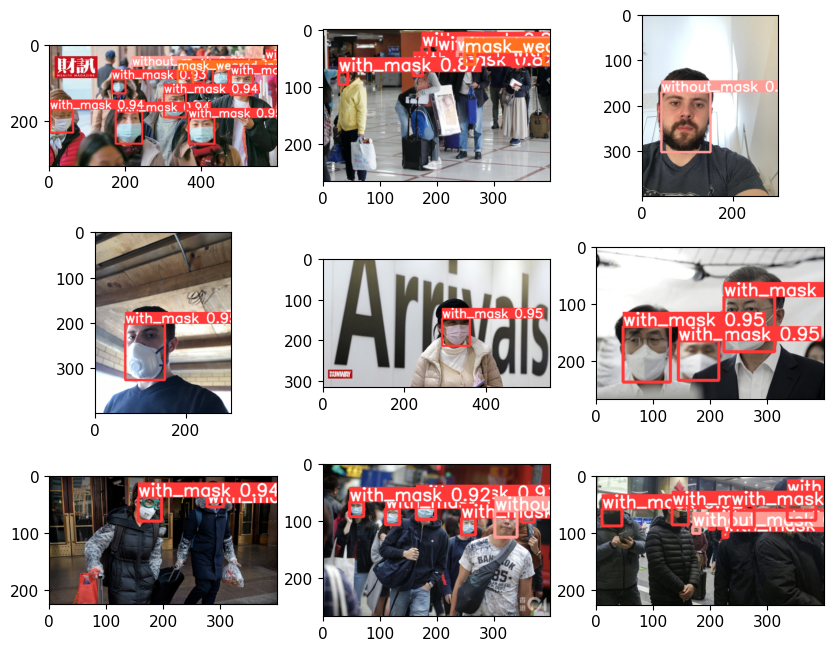

In [9]:
# Visualizing the results
images = glob.glob('runs/detect/exp/*.png')
fig, axis = plt.subplots(3, 3, figsize=(10, 8))

for ax, img in zip(axis.ravel(), images[:9]):
    img_ = plt.imread(img)
    ax.imshow(img_)


### Prediction on custom Image using bestfit trained model

In [10]:
# Loading the current trained best model
model = torch.hub.load('.', 'custom', path='../models/mask_yolov5.pt', source='local')
model.conf = 0.4
model.eval()

YOLOv5 🚀 v7.0-162-gc3e4e94e Python-3.10.9 torch-1.12.1 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 213 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

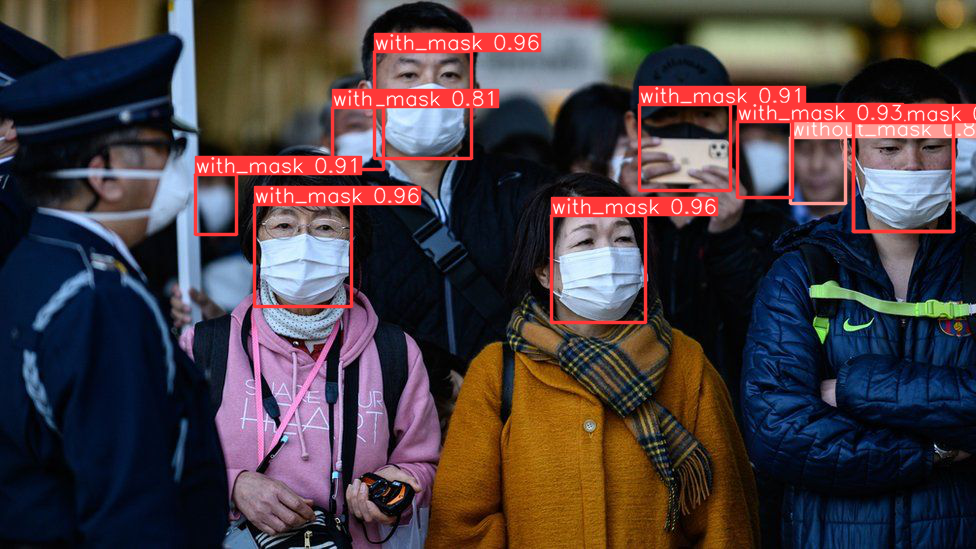

In [11]:
# Prediction of image
url = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/15E1E/production/_111403698_gettyimages-1207855523.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
result = model(image, size=1080)
result.show()


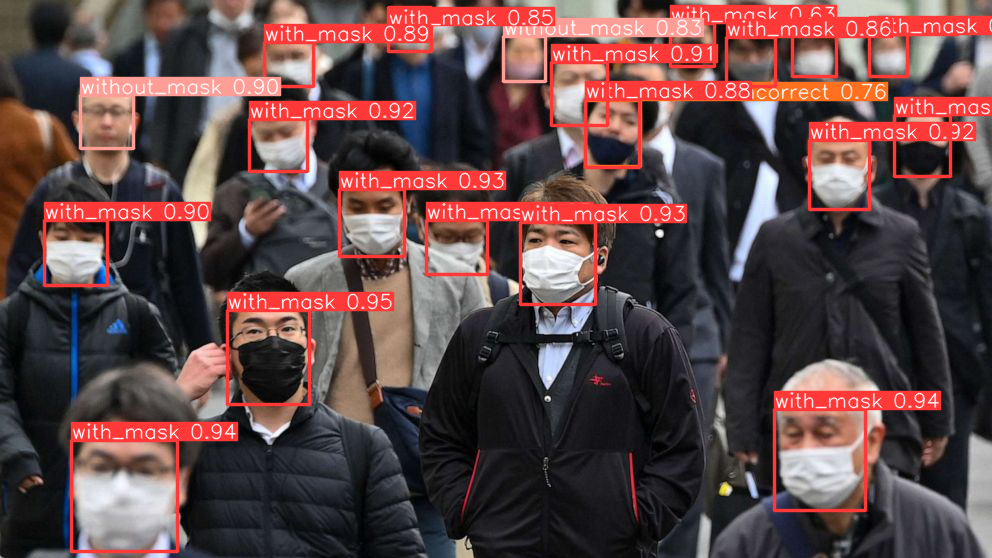

In [12]:
# Prediction of image
url = 'https://s.abcnews.com/images/Health/masks-tokyo-gty-ps-230314_1678802239571_hpMain_16x9_992.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
result = model(image, size=640)
result.show()


## Prediction using custom model on internal cam 

In [11]:
# !python detect.py --source 0

## Prediction using model on Video 

In [14]:
!python detect.py --weights ../models/mask_yolov5.pt --img 640 --conf 0.25 --source ../datasets/input.mp4

detect: weights=['../models/mask_yolov5.pt'], source=../datasets/input.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-162-gc3e4e94e Python-3.10.9 torch-1.12.1 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 213 layers, 7018216 parameters, 0 gradients
[ WARN:0@2.540] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@2.541] global /private/var/folders/sy/f16